In [1]:
# line plot of time series
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
# load dataset
series = read_csv('Resources/overall_monthly.csv', header=0, index_col=0)
# display first few rows
print(series.head(20))

           Rate_Overall
DATE                   
1/1/2000            4.0
2/1/2000            4.1
3/1/2000            4.0
4/1/2000            3.8
5/1/2000            4.0
6/1/2000            4.0
7/1/2000            4.0
8/1/2000            4.1
9/1/2000            3.9
10/1/2000           3.9
11/1/2000           3.9
12/1/2000           3.9
1/1/2001            4.2
2/1/2001            4.2
3/1/2001            4.3
4/1/2001            4.4
5/1/2001            4.3
6/1/2001            4.5
7/1/2001            4.6
8/1/2001            4.9


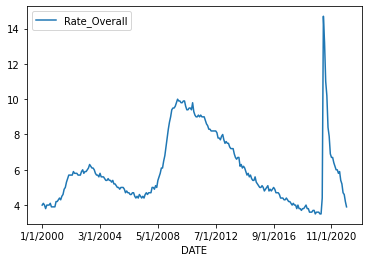

In [2]:
# line plot of dataset
series.plot()
pyplot.show()

## Split the Dataset

In [3]:
# split the dataset
split_point = len(series) - 12
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))

Dataset 252, Validation 12


In [4]:
dataset.to_csv('dataset.csv', index=False)
validation.to_csv('validation.csv', index=False)

## Develop the Model

In [5]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return numpy.array(diff)

In [6]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [7]:
from statsmodels.tsa.arima.model import ARIMA
import numpy
 
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return numpy.array(diff)

In [8]:
import warnings
warnings.filterwarnings('ignore')
# load dataset
series1 = read_csv('dataset.csv', header=0)
# seasonal difference
X = series1.values
months_in_year = 12
differenced = difference(X, months_in_year)
# fit model
model = ARIMA(differenced, order=(0,1,0))
model_fit = model.fit()
# print summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  240
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -271.408
Date:                Sun, 20 Mar 2022   AIC                            544.816
Time:                        19:46:42   BIC                            548.292
Sample:                             0   HQIC                           546.217
                                - 240                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.5674      0.006     97.020      0.000       0.556       0.579
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):            243840.50
Prob(Q):                              0.78   Pr

## One-Step-Out-of-Sample Forecast

### Forecast Function

In [9]:
# one-step out-of sample forecast
forecast = model_fit.forecast()[0]

In [10]:
# invert the differenced forecast to something usable
forecast = inverse_difference(X, forecast, months_in_year)

In [11]:
print('Forecast: %f' % forecast)

Forecast: 6.600000


### Predict Function

In [12]:
# one-step out of sample forecast
start_index = len(differenced)
end_index = len(differenced)
forecast = model_fit.predict(start=start_index, end=end_index)

In [13]:
# invert the differenced forecast to something usable
forecast = inverse_difference(X, forecast, months_in_year)
print('Forecast: %f' % forecast)

Forecast: 6.600000


## Multi-Step Out-of-Sample Forecast

### Forecast Function

In [14]:
# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=12)[0]

In [15]:
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
import numpy
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# load dataset
series = read_csv('dataset.csv', header=0)
# seasonal difference
X = series.values
months_in_year = 12
differenced = difference(X, months_in_year)
# fit model
model = ARIMA(differenced, order=(0,1,0))
model_fit = model.fit()
# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=12)
# invert the differenced forecast to something usable
history = [x for x in X]
month = 1
for yhat in forecast:
	inverted = inverse_difference(history, yhat, months_in_year)
	print('Month %d: %f' % (month, inverted))
	history.append(inverted)
	month += 1

Month 1: 6.600000
Month 2: 6.600000
Month 3: 7.500000
Month 4: 17.800000
Month 5: 16.300000
Month 6: 14.100000
Month 7: 13.300000
Month 8: 11.500000
Month 9: 11.000000
Month 10: 10.000000
Month 11: 9.800000
Month 12: 9.800000


### Predict Function

In [16]:
# multi-step out-of-sample forecast
start_index = len(differenced)
end_index = start_index + 11
forecast = model_fit.predict(start=start_index, end=end_index)

In [17]:
# Predict Function
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
import numpy
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# load dataset
series = read_csv('dataset.csv', header=0)
# seasonal difference
X = series.values
months_in_year = 12
differenced = difference(X, months_in_year)
# fit model
model = ARIMA(differenced, order=(0,1,0))
model_fit = model.fit()
# multi-step out-of-sample forecast
start_index = len(differenced)
end_index = start_index + 11
forecast = model_fit.predict(start=start_index, end=end_index)
# invert the differenced forecast to something usable
history = [x for x in X]
month = 1
for yhat in forecast:
	inverted = inverse_difference(history, yhat, months_in_year)
	print('Month %d: %f' % (month, inverted))
	history.append(inverted)
	month += 1

Month 1: 6.600000
Month 2: 6.600000
Month 3: 7.500000
Month 4: 17.800000
Month 5: 16.300000
Month 6: 14.100000
Month 7: 13.300000
Month 8: 11.500000
Month 9: 11.000000
Month 10: 10.000000
Month 11: 9.800000
Month 12: 9.800000
